# Exploring Data on Prosperous Loans

# Preliminary analysis

This dataset contains information on peer-to-peer lending facilitated by Prosper Lending Company

In [297]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [298]:
# Reading data
df_loan = pd.read_csv('prosperLoanData.csv')

In [299]:
# Reading the first 5 rows of data
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [300]:
# Display of data structure
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [301]:
# Viewing Descriptive Dataset Statistics
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


Note that this dataset contains 81 columns. To do this analysis, I took the following columns:

In [302]:
# List of output columns for analysis
columns_output =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [303]:
# New Dataset with columns to use for analysis
df_output = df_loan[columns_output]

In [304]:
# Displaying a sample of 10 rows of the dataset to analyze
df_output.sample(10)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
20947,60,Current,0.3032,E,1,Employed,0.0,3000.000000,NaN,4000,2013-07-29 00:00:00,0,1
26137,60,Current,0.1400,B,1,Employed,0.0,4916.666667,NaN,15000,2013-12-09 00:00:00,0,69
1888,36,Completed,0.2324,D,15,Employed,0.0,2500.000000,NaN,12000,2012-09-06 00:00:00,0,78
25067,12,Completed,0.1900,D,6,Employed,11.0,6500.000000,1.0,2500,2012-01-12 00:00:00,0,1
103889,36,Current,0.2199,D,2,Employed,5.0,7666.666667,1.0,5000,2012-12-27 00:00:00,0,75
19197,36,Completed,0.1200,NaN,1,Full-time,0.0,10416.666667,NaN,25000,2008-07-30 00:00:00,0,538
56160,36,Completed,0.2750,D,7,Employed,0.0,8333.333333,NaN,4000,2010-08-30 00:00:00,0,151
99647,36,Current,0.0990,A,1,Employed,0.0,4250.000000,NaN,13500,2013-11-13 00:00:00,0,1
90594,36,Chargedoff,0.3177,HR,19,Not employed,0.0,0.000000,NaN,3222,2012-11-26 00:00:00,0,40
74926,36,Completed,0.0885,NaN,0,Part-time,0.0,2916.666667,NaN,10000,2007-03-15 00:00:00,0,337


In [305]:
# Displaying the structure of the dataset for analysis
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   DelinquenciesLast7Years    112947 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  LoanOriginationDate        113937 non-null  object 
 11  Recommendations            113937 non-null  int64  
 12  Investors                  113937 non-null  int64  
dtypes: float64(4), int64(5), obje

In [306]:
# Displaying descriptive statistics of the dataset for analysis
df_output.describe()

,Term,BorrowerRate,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
count,113937.000000,113937.000000,113937.000000,112947.000000,1.139370e+05,22085.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.192764,2.774209,4.154984,5.608026e+03,1.421100,8337.01385,0.048027,80.475228
std,10.436212,0.074818,3.996797,10.160216,7.478497e+03,0.764042,6245.80058,0.332353,103.239020
min,12.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,1.000000
25%,36.000000,0.134000,1.000000,0.000000,3.200333e+03,1.000000,4000.00000,0.000000,2.000000
50%,36.000000,0.184000,1.000000,0.000000,4.666667e+03,1.000000,6500.00000,0.000000,44.000000
75%,36.000000,0.250000,3.000000,3.000000,6.825000e+03,2.000000,12000.00000,0.000000,115.000000
max,60.000000,0.497500,20.000000,99.000000,1.750003e+06,8.000000,35000.00000,39.000000,1189.000000


Since Prosper has only been using its own Prosper Rating since 2009, we have a lot of missing values ​​in the ProsperRating column. Let's remove its missing values:

In [307]:
# Removing missing data from ProsperRating column
df_output = df_output.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [308]:
# Checking the structure of the dataset
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      84853 non-null  int64  
 1   Term                       84853 non-null  int64  
 2   LoanStatus                 84853 non-null  object 
 3   BorrowerRate               84853 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null  object 
 5   ListingCategory (numeric)  84853 non-null  int64  
 6   EmploymentStatus           84853 non-null  object 
 7   DelinquenciesLast7Years    84853 non-null  float64
 8   StatedMonthlyIncome        84853 non-null  float64
 9   TotalProsperLoans          19797 non-null  float64
 10  LoanOriginalAmount         84853 non-null  int64  
 11  LoanOriginationDate        84853 non-null  object 
 12  Recommendations            84853 non-null  int64  
 13  Investors                  84853 non-null  int

Let's convert LoanOriginationDate to datetime data type :

In [309]:
# Converting the format of the LoanOriginationDate column
df_output['LoanOriginationDate'] = pd.to_datetime(df_output['LoanOriginationDate'])

In [310]:
# Replace missing data in TotalProsperLoans column with zero
df_output['TotalProsperLoans'] = df_output['TotalProsperLoans'].fillna(0)

In [311]:
# Checking the structure of the dataset
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Term                       84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   BorrowerRate               84853 non-null  float64       
 4   ProsperRating (Alpha)      84853 non-null  object        
 5   ListingCategory (numeric)  84853 non-null  int64         
 6   EmploymentStatus           84853 non-null  object        
 7   DelinquenciesLast7Years    84853 non-null  float64       
 8   StatedMonthlyIncome        84853 non-null  float64       
 9   TotalProsperLoans          84853 non-null  float64       
 10  LoanOriginalAmount         84853 non-null  int64         
 11  LoanOriginationDate        84853 non-null  datetime64[ns]
 12  Reco

### What is/are the main feature(s) of interest in your dataset?

Let's try to understand which features can be used to predict credit default. Also, we will want to check what are the main factors related to credit score prosperity.
We believe borrowers' Prosper rating will have the greatest impact on default risk. We also expect the loan amount to play a major role and perhaps the credit category. Prosperity score will depend on reported income and employment status.

## Univariate exploration

### Loan status

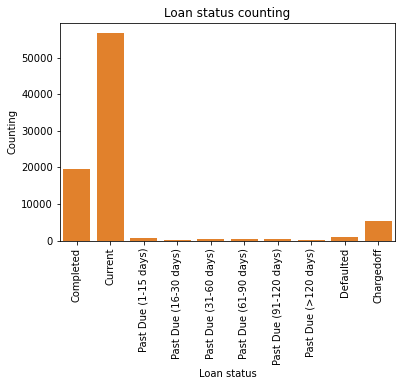

In [312]:
# Display the number of observations in each categorical group of the LoanStatus column
base_color = sns.color_palette()[1]
plt.xticks(rotation=90)
sns.countplot(data = df_output, x = 'LoanStatus', color = base_color,
             order=['Completed', 'Current', 'Past Due (1-15 days)', 'Past Due (16-30 days)',
                    'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 
                    'Past Due (>120 days)', 'Defaulted', 'Chargedoff'])
plt.ylabel('Counting')
plt.xlabel('Loan status')
plt.title('Loan status counting');

**Finding 1:**

* Most of the loans in the dataset are actually current loans.


* Overdue loans are divided into several groups based on the length of the delay in payment.


* The other large portion is completed loans, defaulted loans jeopardize a minority, but written-off loans also jeopardize a substantial amount.

### Employment status

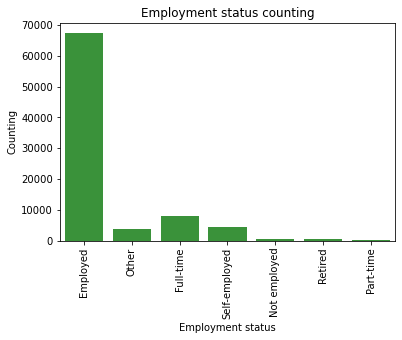

In [313]:
# Displaying the number of observations in each categorical group in the EmploymentStatus column
base_color = sns.color_palette()[2]
sns.countplot(data = df_output, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);
plt.ylabel('Counting')
plt.xlabel("Employment status")
plt.title("Employment status counting");

**Finding 2:**

* The majority of borrowers are employed and all other categories represent a small portion of borrowers.


* In a small group, full time is the highest, after which the freelancers are there and so on.

### Prosperity rating

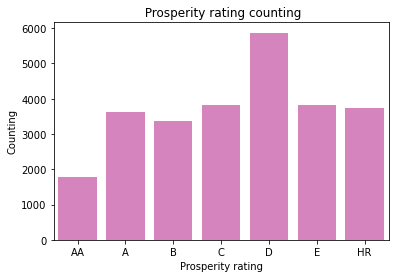

In [337]:
# Displaying the number of observations in each categorical group in the ProsperRating column
base_color = sns.color_palette()[6]
sns.countplot(data = df_output, x = 'ProsperRating (Alpha)', 
              color = base_color, order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
plt.ylabel('Counting')
plt.xlabel("Prosperity rating")
plt.title(" Prosperity rating counting");

**Finding 3 :**

* The most frequently rating is "C".

### Declared monthly income

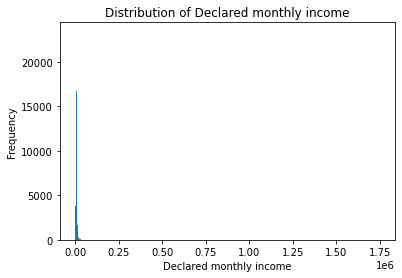

In [315]:
# Showing the Histogram of the StatedMonthlyIncome Column
plt.hist(data=df_output, x='StatedMonthlyIncome', bins=1000);
plt.ylabel('Frequency')
plt.xlabel("Declared monthly income")
plt.title("Distribution of Declared monthly income");

**Note**: The reported monthly income distribution is heavily skewed to the right. So we need to check the number of outliers

In [316]:
# First quantile
Q1 = df_output['StatedMonthlyIncome'].quantile(0.25)
# Third quantile
Q3 = df_output['StatedMonthlyIncome'].quantile(0.75)
# IQR
IQR = Q3 - Q1
# Default Outlier Threshold
DOT = Q1 - 1.5*IQR
# Excess Outlier Threshold
EOT = Q3 + 1.5*IQR

In [317]:
# Showing the number of outliers
len(df_output[df_output['StatedMonthlyIncome'] >= EOT]) +\
len(df_output[df_output['StatedMonthlyIncome'] <= DOT])

3923

In [318]:
EOT

12557.333332499999

**After zooming in on the graph, we get this**

In [319]:
df_output['StatedMonthlyIncome'].max()

1750002.916667

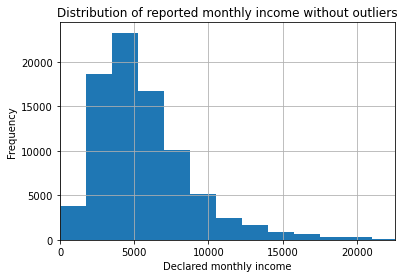

In [320]:
# Distribution of the StatedMonthlyIncome column without outliers
plt.hist(data=df_output, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, EOT+10000)
plt.grid()
plt.ylabel('Frequency')
plt.xlabel("Declared monthly income")
plt.title("Distribution of reported monthly income without outliers");

**Finding 4:**

* The monthly income distribution still has a noticeable right skew, but now we can see that the mode is around 5000.

### Discuss the distribution(s) of your variables of interest. Were there any unusual points? Did you need to perform any transformations?

The monthly reported income distribution is very **awkward**: with lots of outliers and a very wide range, but it was still skewed. The majority of borrowers are employed and all other categories a small portion of borrowers and most loans in the data set are actually outstanding loans.

### Among the features you investigated, were there any unusual distributions? Did you perform any data operations to tidy, adjust, or change the shape of the data? If so, why did you do this?

The majority of credits are actually current credits. Since our primary focus is to define the determinants of loan outcome, we are not interested in active loans.

## Bivariate exploration

In [321]:
# Data Shape Adjustment
condition = (df_output['LoanStatus'] == 'Completed') | (df_output['LoanStatus'] == 'Defaulted') |\
                  (df_output['LoanStatus'] == 'Chargedoff')
df_output = df_output[condition]

def default_change(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
df_output['LoanStatus'] = df_output.apply(default_change, axis=1)
df_output['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

**After transforming the dataset, we have 19,664 completed loans and 6,341 in defaulted.**

In [322]:
# Reduction of the number of categories
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
df_output['ListingCategory (numeric)'] = df_output.apply(reduce_categorie, axis=1)
df_output['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

**The variable list category is configured as numeric and most of the values ​​have a very low frequency, for easier viewing, so we changed it to a category and reduced the number of categories.**

### Loan Status and Prosperity Rating

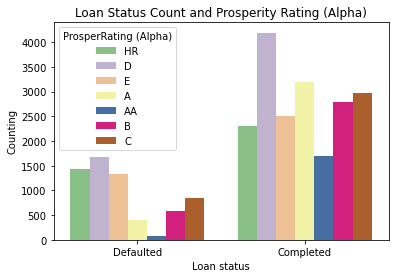

In [323]:
# Display the number of observations in each categorical
# group, the LoanStatus and ProsperRating columns (Alpha)
sns.countplot(data = df_output, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Accent')
plt.ylabel('Counting')
plt.xlabel("Loan status")
plt.title("Loan Status Count and Prosperity Rating (Alpha)");

**Finding 1:**

* The most common rating among loans in default is actually "D".


* And the highest grade among the completed is also "D" and the second highest is "A" and so on.

### Credit start with registration category

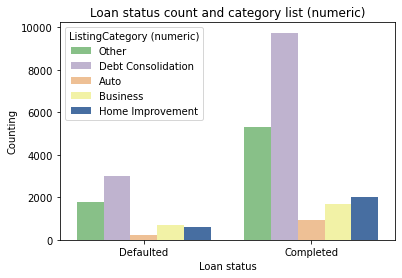

In [324]:
# Display the number of observations in each categorical 
# group of the LoanStatus and ListingCategory column(numeric)
sns.countplot(data = df_output, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'Accent')
plt.ylabel('Counting')
plt.xlabel("Loan status")
plt.title("Loan status count and category list (numeric)");

**Finding 2:**

* In both graphs, "debt consolidation" has the highest frequency among all.

### Employment status and loan status

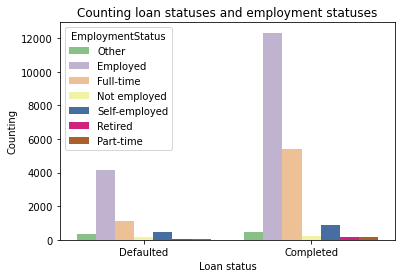

In [325]:
# Display the number of observations in each categorical 
# group of the LoanStatus and ListingCategory column (numeric)
sns.countplot(data = df_output, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Accent')
plt.ylabel('Counting')
plt.xlabel("Loan status")
plt.title("Counting loan statuses and employment statuses");

**Finding 3:**

* From the graph above, we can say that "employees" are taking more loans.

### Loan status and loan amount

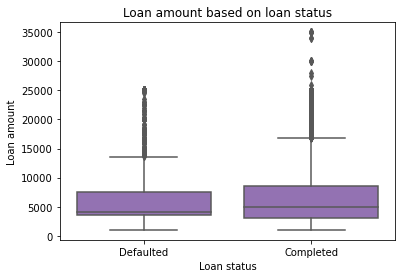

In [326]:
# Box and whisker plot display for the LoanStatus column
base_color = sns.color_palette()[4]
sns.boxplot(data = df_output, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);
plt.xlabel('Loan status')
plt.ylabel("Loan amount")
plt.title("Loan amount based on loan status");

**Finding 4:**

* From the chart above, we can tell that "Defaulted Loans" tend to be smaller than "Completed Loans".

### Prosperity rating and employment status

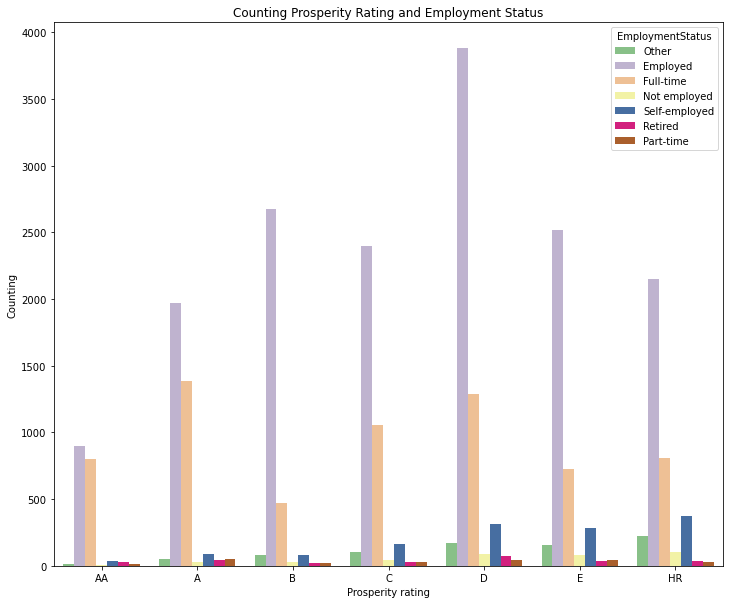

In [327]:
# Display the number of observations in each categorical 
# group of the ProsperRating (Alpha) and EmploymentStatus column
plt.figure(figsize = [12, 10])
sns.countplot(data = df_output, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', 
              palette = 'Accent', order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
plt.ylabel('Counting')
plt.xlabel("Prosperity rating")
plt.title("Counting Prosperity Rating and Employment Status");

**Finding 5:**

* The lower coasts seem to have larger proportions of people with the employment status "Not employed", "Self-employed", "Retired" and "Part-time".

### Loan amount and employment status

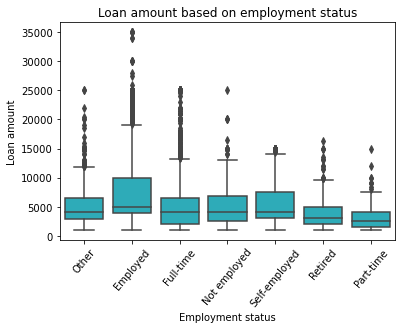

In [328]:
# Box and whisker plot display for the LoanStatus column
base_color = sns.color_palette()[9]
sns.boxplot(data = df_output, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color = base_color);
plt.xlabel("Employment status")
plt.ylabel("Loan amount")
plt.title("Loan amount based on employment status")
plt.xticks(rotation=50);

**Finding 6:**

* From the graph above, we can tell that "employees" tend to take the largest loan amounts

### Talk about some of the relationships you observed in this part of the survey. How did the feature(s) of interest vary with other features in the dataset?

In loan status versus loan amount, defaulted loans tend to be smaller than once-completed loans. The employment status of people with lower ratings tends to be "Not employed", "Self-employed", "Retired", or "Part-time".

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The Prosperity "D" rating is the most common rating among defaulted loans.

## Multivariate exploration

### Rating, loan amount and loan status

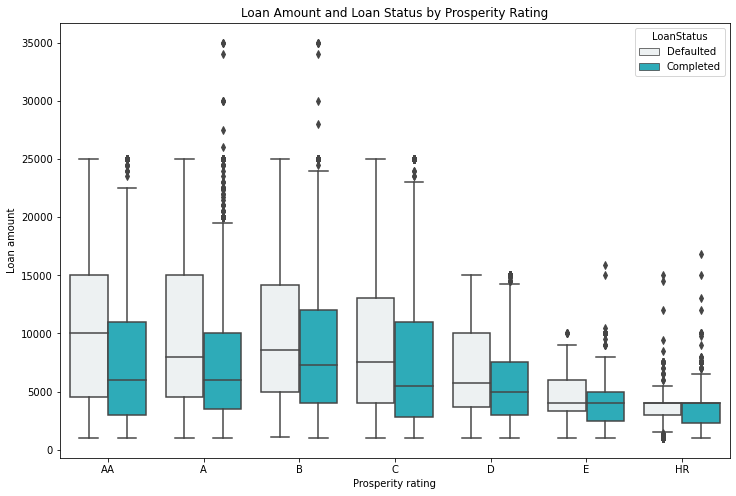

In [336]:
# Box and whisker plot display for the ProsperRating column
base_color = sns.color_palette()[9]
plt.figure(figsize = [12, 8])
sns.boxplot(data=df_output, x='ProsperRating (Alpha)', 
            y='LoanOriginalAmount', hue='LoanStatus', color = base_color,
            order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
plt.ylabel('Loan amount')
plt.xlabel("Prosperity rating")
plt.title("Loan Amount and Loan Status by Prosperity Rating");

**Finding 1:**

* With the exception of the lowest ratings, defaulted credits tend to be larger than completed credits.


* Most defaulted loans come from people with low prosperity ratings.

### Rating, loan amount and employment status

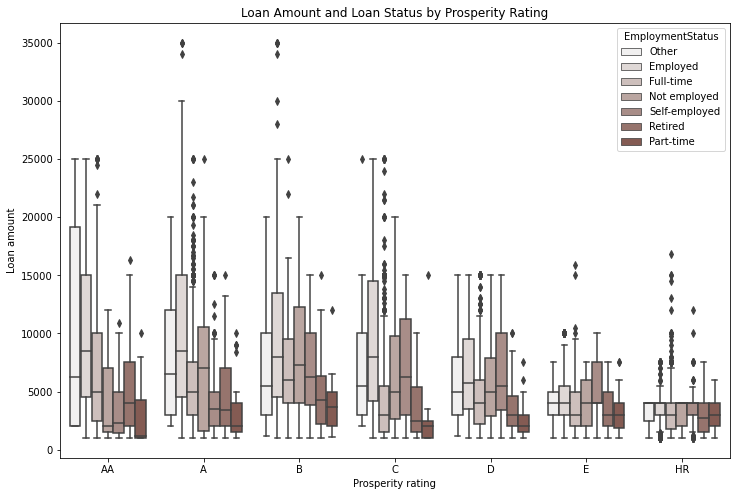

In [334]:
# Box and whisker plot display for the ProsperRating column
base_color = sns.color_palette()[5]
plt.figure(figsize = [12, 8])
sns.boxplot(data=df_output, x='ProsperRating (Alpha)', y='LoanOriginalAmount', 
            hue='EmploymentStatus', color = base_color, 
            order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])
plt.ylabel('Loan amount')
plt.xlabel("Prosperity rating")
plt.title("Loan Amount and Loan Status by Prosperity Rating");

**Finding 2:**

* With the exception of the lowest grades, employees tend to be more important than completed credits.


* Most employees have a low prosperity rating.

### Relationships between credit category, credit rating and credit score

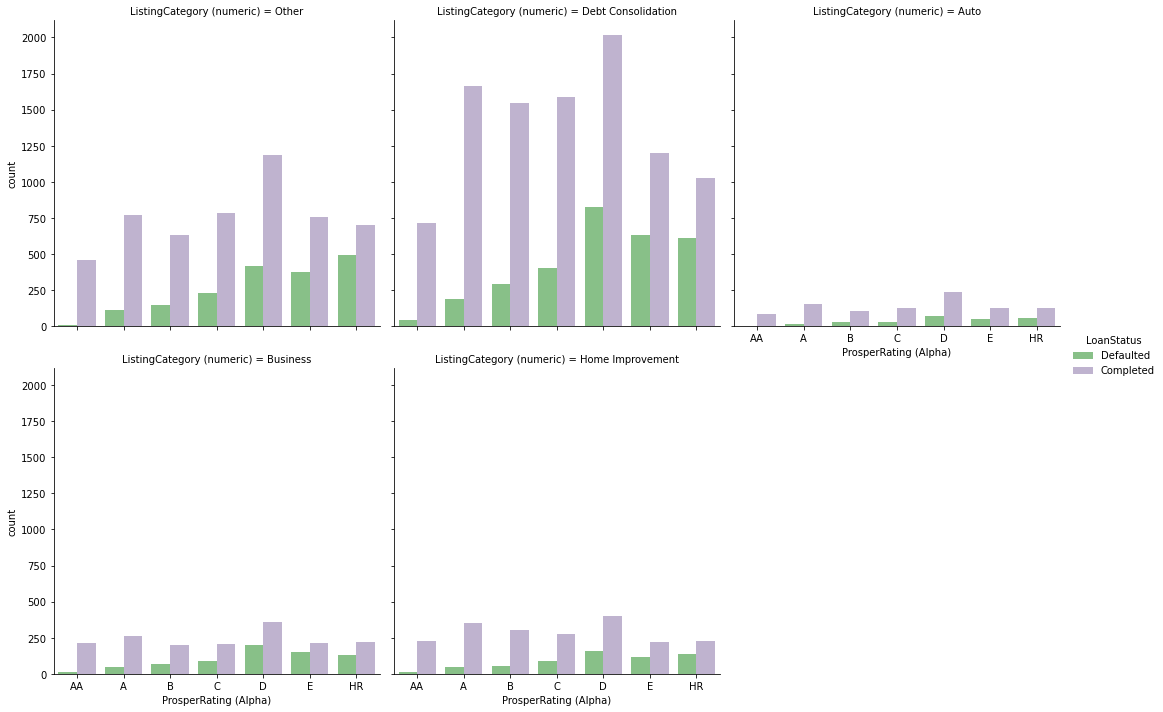

In [333]:
# Diagrams to illustrate the relationship between the ProsperRating, LoanStatus, and ListingCategory columns
sns.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = df_output, kind = 'count', palette = 'Accent', col_wrap = 3, 
            order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);

**Finding 3:**

* There are 5 charts in the second which have many highs and lows other than all.


* There is no substantial difference for the default rates in the different categories broken down by rating.

### Relationship between Loan Amount, Loan Category and Loan Status

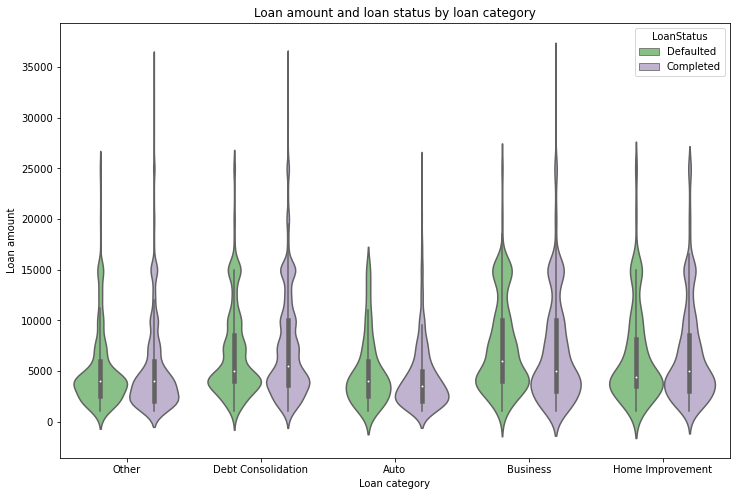

In [332]:
# Diagram to present the interactions between the ListingCategory, LoanStatus and LoanOriginalAmount columns
plt.figure(figsize = [12, 8])
sns.violinplot(data=df_output, x='ListingCategory (numeric)', y='LoanOriginalAmount', 
               hue='LoanStatus', palette = 'Accent');
plt.ylabel('Loan amount')
plt.xlabel("Loan category")
plt.title("Loan amount and loan status by loan category");

**Finding 4:**

* With the exception of automotive, business and home improvement do not average nearly evenly between them.


* The business category tends to have a higher amount.

### Talk about some of the relationships you observed in this part of the survey. Were there any features that got stronger in terms of reviewing your features of interest?

Our initial assumptions have been reinforced. Most defaulted credits come from people with a low Prosper rating and the Business category tends to have a higher amount.

### Were there any interesting or surprising feature interactions?

An interesting finding is that past due credits for people with high prosperity ratings tend to be larger than completed credits.